In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Get the spam data collection 
df_spam = pd.read_csv("C:\\Users\\Dell\\Downloads\\1574413540_lesson91\\Lesson 9 -1\\SpamCollection\\SpamCollection\\SpamCollection", sep= '\t', names=['Label', 'Comment'])

In [3]:
df_spam.head()

,Label,Comment
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df_spam.shape

(5572, 2)

In [5]:
df_spam.describe()

,Label,Comment
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df_spam.groupby(['Label']).size()

Label
ham     4825
spam     747
dtype: int64

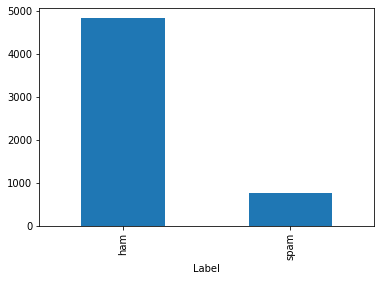

In [7]:
df_spam.groupby(['Label']).size().plot(kind='bar')
plt.show()

In [8]:
#view response
df_spam.groupby('Label').describe()

Comment                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
#Verify length of the messages and also add it as a new column 
df_spam['Length'] = df_spam['Comment'].apply(len)

In [10]:
df_spam

,Label,Comment,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [11]:
# import Libraries
import re
import string
from nltk.corpus import stopwords

#define a function to get rid of stopwords present in the messages
def message_text_processing(mess):
    message = re.sub('[^a-zA-Z]', ' ', mess)
    message = message.lower()
    message = message.split()
    
    return [word for word in message if message not in stopwords.words('english')]

In [12]:
df_spam['Comment'].head(5).apply(message_text_processing)

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
Name: Comment, dtype: object

In [13]:
#start text processing with vectorizer 
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
#use bag of words by applying the function and fit the data into it
bag_of_words_transform = CountVectorizer(analyzer=message_text_processing).fit(df_spam['Comment'])

In [15]:
#print length of bag of words stored in the vocabulary_ attribute
print(len(bag_of_words_transform.vocabulary_))

7785


In [16]:
message_bagofwords = bag_of_words_transform.transform(df_spam['Comment'])
message_bagofwords

<5572x7785 sparse matrix of type '<class 'numpy.int64'>'
	with 79158 stored elements in Compressed Sparse Row format>

In [17]:
#apply tfidf transformer and fit the bag of words into it (transformed version)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(message_bagofwords)

In [18]:
#print shape of the tfidf 
message_tfidf = tfidf_transformer.transform(message_bagofwords)
message_tfidf.shape

(5572, 7785)

In [19]:
#choose naive Bayes model to detect the spam and fit the tfidf data into it
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(message_tfidf, df_spam['Label'])

In [20]:
#check model for the predicted and expected value say for message#2 and message#5
message = df_spam['Comment'][10]
bag_of_words_message = bag_of_words_transform.transform([message])
tfidf = tfidf_transformer.transform(bag_of_words_message)

In [21]:
predicted = spam_detect_model.predict(tfidf)
predicted

array(['ham'], dtype='<U4')

In [22]:
df_spam['Label'][10]

'ham'

# Thank You